In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
ds=pd.read_csv('Real_estate.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
ds.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
ds.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
ds.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [3]:
X=ds.drop(['No','Y house price of unit area'],axis=1)
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [4]:
y=ds['Y house price of unit area']
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred=lr.predict(X_test)

In [10]:
y_pred

array([13.36200709, 10.46702902, 21.1309444 , 47.51821861, 32.19604529,
       38.29484911, 35.6601396 , 41.19990963, 47.71302799, 40.07561216,
       45.02931772, 33.19025175, 41.68856441, 35.93619794, 43.53760772,
       45.52775148, 39.76828142, 44.54567674, 48.02668394, 44.89412847,
       43.68952256, 54.14326792, 47.93998304, 37.30552851, 34.39726048,
       48.1890637 , 40.48530867, 49.51891453, 46.66380666, 39.81558938,
       47.34917303, 40.58522657, 45.03432956, 44.20805178, 46.42068741,
        8.60581282, 39.49449402, 40.77973144,  8.96941114, 54.9763222 ,
       32.34268168, 48.82636539, 25.91343282, 47.69340627, 40.42562406,
       50.27322481, 42.37967759, 38.00524935, 43.52778567, 36.60913578,
       47.14896225, 34.34219138, 43.79283299, 16.79084146, 38.09559746,
       48.57761705, 44.35772909, 44.10136466, 45.3481875 , 40.26076485,
       35.63392053, 45.39676575, 42.18649771, 43.33314043, 53.00620842,
       44.12043985, 24.0143795 , 46.91423046, 31.93471132, 41.50

In [11]:
print(lr.intercept_)

-12815.542837716077


In [12]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
X1 transaction date,5.064142
X2 house age,-0.283627
X3 distance to the nearest MRT station,-0.004815
X4 number of convenience stores,1.002671
X5 latitude,230.625349
X6 longitude,-25.451241


In [13]:
from sklearn import metrics

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.466522594038816
MSE: 52.210965481455304
RMSE: 7.225715568817756


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("Model Accuracy : {:0.2f}%".format(lr.score(X_test, y_test)*100))
print("Cross Validation : {:0.2f}%".format(accuracies.mean()*100))

Model Accuracy : 65.84%
Cross Validation : 50.15%


In [60]:
ds=ds.drop('No',axis=1)

In [61]:
xd=ds.iloc[:,:-1].values

In [62]:
xd=np.append(arr=np.ones((414,1)).astype(int),values=xd,axis=1)
xd

array([[1.0000000e+00, 2.0129170e+03, 3.2000000e+01, ..., 1.0000000e+01,
        2.4982980e+01, 1.2154024e+02],
       [1.0000000e+00, 2.0129170e+03, 1.9500000e+01, ..., 9.0000000e+00,
        2.4980340e+01, 1.2153951e+02],
       [1.0000000e+00, 2.0135830e+03, 1.3300000e+01, ..., 5.0000000e+00,
        2.4987460e+01, 1.2154391e+02],
       ...,
       [1.0000000e+00, 2.0132500e+03, 1.8800000e+01, ..., 7.0000000e+00,
        2.4979230e+01, 1.2153986e+02],
       [1.0000000e+00, 2.0130000e+03, 8.1000000e+00, ..., 5.0000000e+00,
        2.4966740e+01, 1.2154067e+02],
       [1.0000000e+00, 2.0135000e+03, 6.5000000e+00, ..., 9.0000000e+00,
        2.4974330e+01, 1.2154310e+02]])

In [63]:
yd=ds.iloc[:,6].values


In [64]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.5, random_state=0)

In [65]:
lm=LinearRegression()

In [66]:
lm.fit(Xd_train, yd_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
yd_pred=lm.predict(Xd_test)

In [68]:
yd_pred

array([41.92064462, 10.93468485, 42.64344531, 10.70605137, 44.91859311,
       39.64858491, 41.1131637 , 35.31963136, 50.44514305, 47.10781354,
       46.80620113, 41.81038119, 41.3082915 , 40.48435057, 47.95529461,
       39.413348  , 40.31140085, 43.47278982, 41.64358335, 42.25117681,
       49.77627059, 32.55964115, 39.34608272, 46.52173576, 47.24137454,
       43.87445518, 46.92864013, 25.7133881 , 49.43640726, 21.47047791,
       46.68811686, 37.25263518, 44.63428931, 39.96592449, 44.04358029,
       34.01632134, 47.29183282, 40.31795204, 52.19428568,  2.88141762,
       53.34093492, 33.94142368, 34.12349411, 49.63580618, 14.18935666,
       44.62260518, 41.77612346, 11.21714073, 34.46427814, 50.09967093,
       54.59211946, 38.07904866, 47.48821781, 26.77992344, 32.07947918,
       34.76356846, 50.24953907, 41.33615379, 43.89284074, 34.84168418,
       43.80974953, 43.98323687, 41.3061515 , 47.58838377, 37.07429947,
       29.52244036,  6.7122367 , 35.29485293, 46.91867095, 39.64

In [47]:
import statsmodels.api as sm

In [48]:
x_opt=xd[:,[4,5]]

In [49]:
rg=sm.OLS(endog=yd, exog=x_opt).fit()

In [50]:
rg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              2489.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   8.95e-231
Time:                        16:13:07   Log-Likelihood:                         -1585.8
No. Observations:                 414   AIC:                                      3176.
Df Residuals:                     412   BIC:                                      3184.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6347      0.187     14.104      0.000       2.267       3.002
x2             1.0892      0.038     28.876      0.000       1.015       1.163
==============================================================================
Omnibus:                      172.065   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1420.420
Skew:                           1.554   Prob(JB):                    3.63e-309
Kurtosis:                      11.526   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
yd_test.size

207

In [112]:
x=Xd_test[:,4:5]

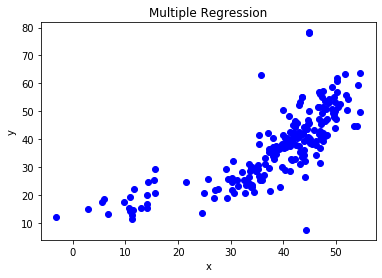

In [114]:
plt.scatter(yd_pred, yd_test, color='blue')
#plt.plot(x, lm.predict(x), color='red')
plt.title('Multiple Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()